# Generating Training Data

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import math
import random

import numpy as np
from scipy import stats

In [3]:
functions = [lambda x : x, 
             lambda x : 101 - x,
             lambda x : 50.5 + 49.5 * math.sin(math.pi / 2 + x / (5 * math.pi)),
             lambda x : random.randint(1, 101)]

In [4]:
points = []
xs = []
ys = []
for i in range(50):
    x = random.randint(1,101)
    y = functions[2](x)
#     print(x, y)
    points.append((x,y))
    xs.append(x)
    ys.append(y)

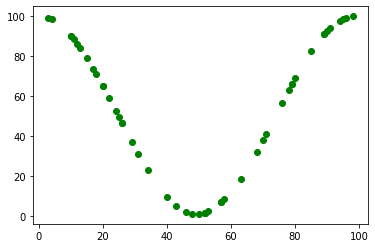

In [5]:
plt.figure()
plt.scatter(xs, ys, color="green")

In [6]:
def plot_function(func_num, plot=True):
    """
    Plot 50 (x,y) pairs for given function
    """
    points = []
    xs = []
    ys = []
    colors = ['maroon', 'blue', 'green', 'orange']
    for i in range(50):
        x = random.randint(1,101)
        y = functions[func_num](x)
    #     print(x, y)
        points.append((x,y))
        xs.append(x)
        ys.append(y)
    if plot:
        plt.figure()
        plt.scatter(xs, ys, color=colors[func_num])
    return (xs, ys)

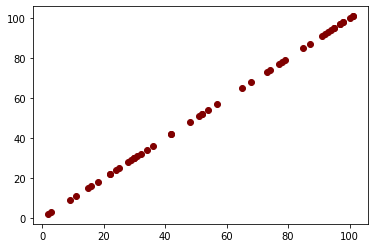

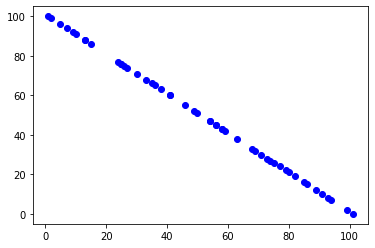

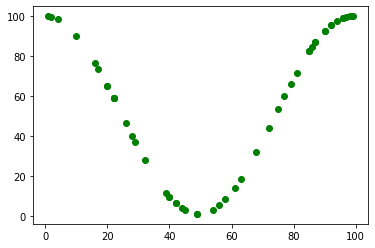

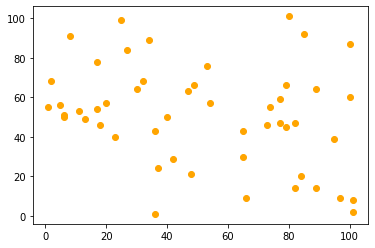

In [7]:
for i in range(4):
    plot_function(i)

In [8]:
def graph_normal(mu, sigma):
    # uncomment this code to graph the normal distribution 
    a = np.random.normal(mu, sigma, 1000)
    count, bins, ignored = plt.hist(a, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
             linewidth=2, color='r')
    plt.show()

In [9]:
# mu, sigma = 0, 1 # mean and standard deviation
a = np.random.normal(1, 1, 1000)
b = np.random.normal(0, 1, 1000)

In [10]:
asum= 0
for i in range(25):
    asum += a[random.randint(0,len(a)-1)]
print(asum/25)

1.001714951238107


# Model for Generations

In [11]:
def get_prob_data_given_func(points_known, a, b, y_sigma=20):
#     prod = 1
    prod = 0
    for x, y in points_known:
        y_pred = a*x+b
        norm = np.log(stats.norm.pdf(y_pred, y, y_sigma))
#         prod = prod * norm
        prod = prod + norm
    return prod

def get_probs_for_discrete_funcs_given_data(points_known, mu_a=1.0, mu_b=0.0, sigma_a=1.0, sigma_b=1.0, out=False):
    probs = np.zeros((500,200))
#     probs = np.zeros((5,2))
    for a in np.arange(-2.0, 3.0, 0.01):
        for b in np.arange(-1.0, 1.0, 0.01):
            prob_a = stats.norm.pdf(a, mu_a, sigma_a)
            prob_b = stats.norm.pdf(b, mu_b, sigma_b)
            prob_data_given_func = get_prob_data_given_func(points_known, a, b)
            if out:
                print("values of a, b", a, b)
                print("multiplication", prob_data_given_func + np.log(prob_a) + np.log(prob_b))
            probs[int(100*a+200)][int(100*b+100)] = np.exp(prob_data_given_func + np.log(prob_a) + np.log(prob_b))
            
    return probs

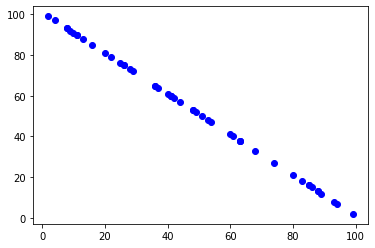

In [107]:
xs_1, ys_1 = plot_function(1, plot=True)
xs = list(np.copy(xs_1))
ys = list(np.copy(ys_1))

In [108]:
train_set = []
for i in range(25):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    train_set.append((x,y))

In [301]:
mu_a, sigma_a = 1.0, 20.0
mu_b, sigma_b = 0.0, 20.0
probs = get_probs_for_discrete_funcs_given_data(train_set, mu_a, mu_b, sigma_a, sigma_b,)

In [278]:
# ii = np.unravel_index(np.argsort(probs.ravel())[-10:], probs.shape)
# opts = []
# for i in range(len(ii[0])):
#     opts.append(((ii[0][i]-200)/100, (ii[1][i]-100)/100))

In [279]:
# np.unravel_index(probs.argmax(), probs.shape)

In [302]:
probs_2 = np.copy(probs)

In [303]:
# a = np.random.rand(3, 4)
probs_2 /= probs_2.sum()
# print(a)
def sample(a, n=1):
    a = np.asarray(a)
    choices = np.prod(a.shape)
    index = np.random.choice(choices, size=n, p=a.ravel())
    return np.unravel_index(index, dims=a.shape)

ans = sample(probs_2)
a, b = ans[0][0], ans[1][0]
a = (a - 200) / 100
b = (b - 100) / 100
a, b

(0.59, 0.92)

In [109]:
train_x, train_y = [], []
for t in train_set:
    train_x.append(t[0])
    train_y.append(t[1])
xs, ys = [], []
for x in xs_1:
    if x not in train_x:
        xs.append(x)
        ys.append(ys_1[xs_1.index(x)])

In [110]:
len(xs), len(ys)

(20, 20)

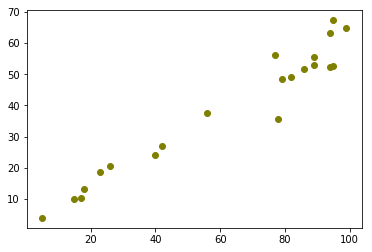

In [331]:
new_x = []
new_y = []
for i in range(21):
# for i in range(len(new_x)):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
#     x = new_x[i]
#     y = new_y[i]
    
    ans = sample(probs_2)
    a, b = ans[0][0], ans[1][0]
    a = (a - 200) / 100
    b = (b - 100) / 100

    mu = a * x + b
    sigma = 0.001
    
    y = np.random.normal(mu, sigma, 1000)
    y = y[random.randint(0,len(y)-1)]
    
#     # alternative method to sample from normal
#     y = mu + np.random.normal() * sigma
    
    new_x.append(x)
    new_y.append(y)

# graph after one generation

plt.figure()
plt.scatter(new_x, new_y, color="#808000")

# Redacted

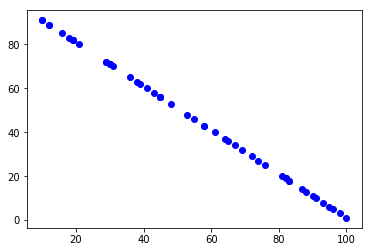

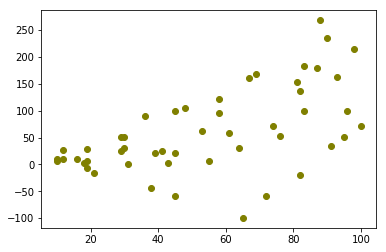

In [11]:
# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=True)

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

new_x = []
new_y = []
for i in range(50):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    bag_x.append(x)
    bag_y.append(y)

    mu = a[random.randint(0,len(a)-1)] * x + b[random.randint(0,len(b)-1)]
    
    sigma = 0.001
    
    y = np.random.normal(mu, sigma, 1000)
    y = y[random.randint(0,len(y)-1)]
    
#     # alternative method to sample from normal
#     y = mu + np.random.normal() * sigma
    
    new_x.append(x)
    new_y.append(y)

# graph after one generation

plt.figure()
plt.scatter(new_x, new_y, color="#808000")

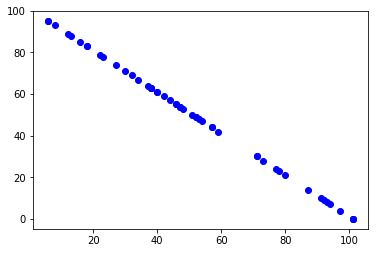

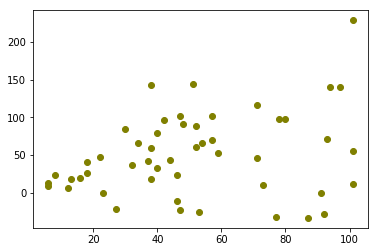

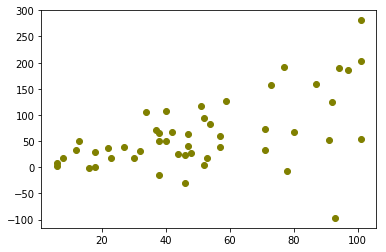

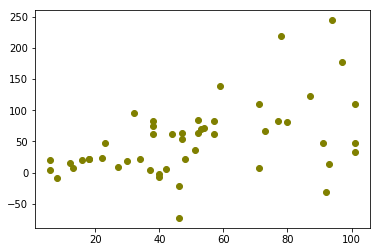

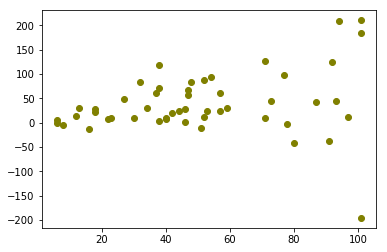

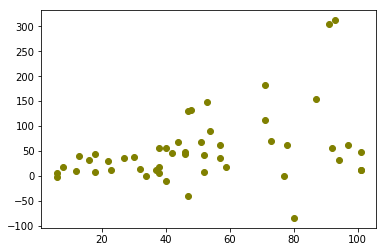

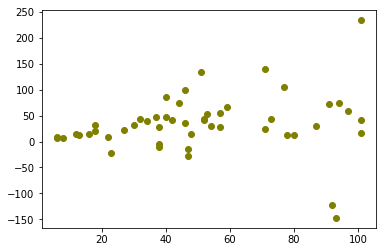

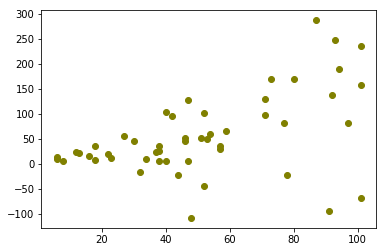

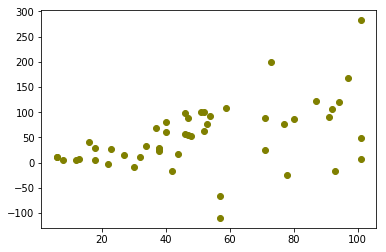

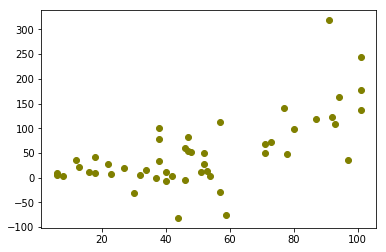

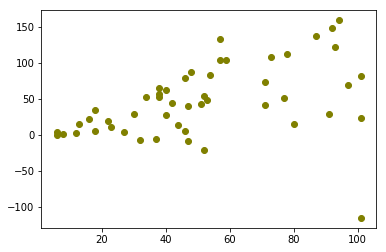

In [12]:
#### for multiple generations


# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=True)

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

for i in range(10):
    
#     print(xs, ys)
    
    new_x = []
    new_y = []
    for i in range(50):
#         ind = random.randint(0, len(xs)-1)
#         x = xs.pop(ind)
#         y = ys.pop(ind)
        
        x = xs[i]
        y = ys[i]

        bag_x.append(x)
        bag_y.append(y)

        mu = a[random.randint(0,len(a)-1)] * x + b[random.randint(0,len(b)-1)]

        sigma = 0.001

        y = np.random.normal(mu, sigma, 1000)
        y = y[random.randint(0,len(y)-1)]

    #     # alternative method to sample from normal
    #     y = mu + np.random.normal() * sigma

        new_x.append(x)
        new_y.append(y)

    # graph after one generation

    plt.figure()
    plt.scatter(new_x, new_y, color="#808000")
    
    xs = new_x
    ys = new_y

In [ ]:
N= 25
X = train_x
Y = train_y


# learning 

with pm.Model() as model:
    sig = 1
    
    a1 = pm.Normal('a1', mu=1, sigma=sig)
    b1 = pm.Normal('b1', mu=0, sigma=sig)
    a2 = pm.Normal('a2', mu=-1, sigma=sig)
    b2 = pm.Normal('b2', mu=1, sigma=sig)
    
#     arr = np.array([a1, a2])
#     a = pm.Deterministic('a', np.array([a1, a2]))
#     b = pm.Deterministic('b', np.array([b1, b2]))

#     a = np.array([a1, a2])
#     b = np.array([b1, b2])

    a = pm.Deterministic('a', tt.stack([a1, a2]))
    b = pm.Deterministic('b', tt.stack([b1, b2]))
    
    p = pm.Uniform('p', lower=0, upper=1)
    
#     z = pm.Binomial('z', n=1, p=p, shape=N)
#     mu = a[z]*X + b[z]
#     e = pm.Normal('e', 0, 2)
#     y = pm.Normal('y', mu=mu, sigma=e, observed=Y[i])
    
    for i in range(N):
        z = pm.Binomial('z_%u' % i, n=1, p=p)
        mu = a[z]*X[i] + b[z]
        y = pm.Normal('y_%u' % i, mu=mu, sigma=2, observed=Y[i])
    
#     for i in range(N):
#         z_test = pm.Binomial('z_test_%u' % i, n=1, p=p)
#         mu_test = a[z_test]*X_test[i] + b[z_test]
# #         e_test = pm.Normal('e_test_%u' % i, 0, 2)
#         y_test = pm.Deterministic('y_%u' % i, mu=mu_test, sigma=2)
    
    trace = pm.sample(100)
        
        
# sample random 25 X for the next generation                                                                                                          7 7rr

# Using pymc3

In [16]:
import pymc3 as pm
import theano.tensor as tt
import theano

In [68]:
N= 25
X = train_x
Y = train_y

X_test = xs


# learning 

with pm.Model() as model:
    sig = 1
    
    a1 = pm.Normal('a1', mu=1, sigma=sig)
    b1 = pm.Normal('b1', mu=0, sigma=sig)
    a2 = pm.Normal('a2', mu=-1, sigma=sig)
    b2 = pm.Normal('b2', mu=1, sigma=sig)
    
#     arr = np.array([a1, a2])
#     a = pm.Deterministic('a', np.array([a1, a2]))
#     b = pm.Deterministic('b', np.array([b1, b2]))

#     a = np.array([a1, a2])
#     b = np.array([b1, b2])

    a = pm.Deterministic('a', tt.stack([a1, a2]))
    b = pm.Deterministic('b', tt.stack([b1, b2]))
    
    p = pm.Uniform('p', lower=0, upper=1)
    
#     z = pm.Binomial('z', n=1, p=p, shape=N)
#     mu = a[z]*X + b[z]
#     e = pm.Normal('e', 0, 2)
#     y = pm.Normal('y', mu=mu, sigma=e, observed=Y[i])
    
    for i in range(N):
        z = pm.Bernoulli('z_%u' % i, p=p)
        mu = a[z]*X[i] + b[z]
        y = pm.Normal('y_%u' % i, mu=mu, sigma=2, observed=Y[i])
    
    for i in range(20):
        z_test = pm.Bernoulli('z_test_%u' % i, p=p)
        mu_test = a[z_test]*X_test[i] + b[z_test]
        y_test = pm.Normal('y_test_%u' % i, mu=mu_test, sigma=2)
    
    trace = pm.sample(100)
        
        
# sample random 25 X for the next generation                                                                                                          7 7rr

INFO (theano.gof.compilelock): Refreshing lock /Users/pkarnati/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock
Only 100 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [y_test_19, y_test_18, y_test_17, y_test_16, y_test_15, y_test_14, y_test_13, y_test_12, y_test_11, y_test_10, y_test_9, y_test_8, y_test_7, y_test_6, y_test_5, y_test_4, y_test_3, y_test_2, y_test_1, y_test_0, p, b2, a2, b1, a1]
>BinaryGibbsMetropolis: [z_0, z_1, z_2, z_3, z_4, z_5, z_6, z_7, z_8, z_9, z_10, z_11, z_12, z_13, z_14, z_15, z_16, z_17, z_18, z_19, z_20, z_21, z_22, z_23, z_24, z_test_0, z_test_1, z_test_2, z_test_3, z_test_4, z_test_5, z_test_6, z_test_7, z_test_8, z_test_9, z_test_10, z_test_11, z_test_12, z_test_13, z_test_14, z_test_15, z_test_16, z_test_17, z_test_18, z_test_19]
Sampling 4 chains, 93 divergences: 100%|██████████| 2400/2400 [00:46<00:00, 51.31draws/s]
/Users/pkarnati/Library/Python/3.6/lib/python/site-packages/xarray/core/n

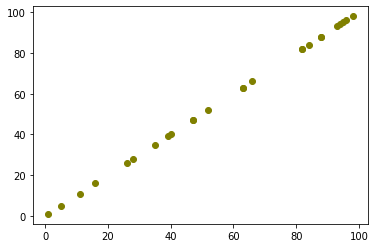

In [73]:
plt.figure()
plt.scatter(X, Y, color="#808000")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12b407e10>],
      dtype=object)

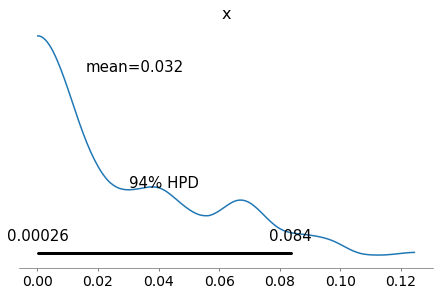

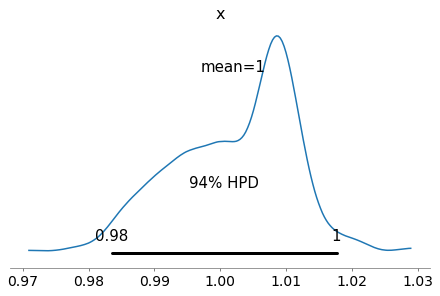

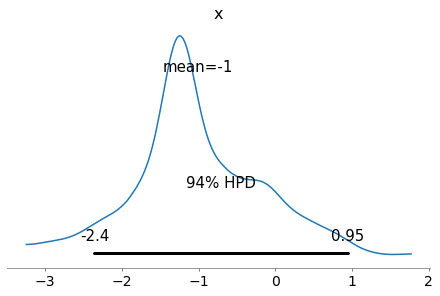

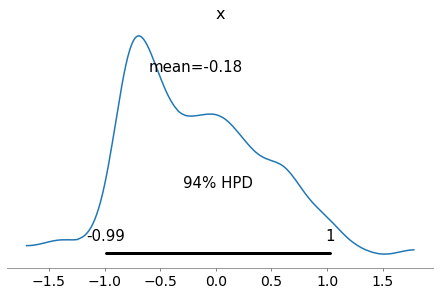

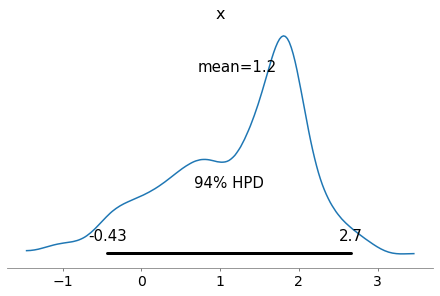

In [106]:
# p is low, p = probability of getting 1 for Bernoulli flip
pm.plot_posterior(trace['p'])
pm.plot_posterior(trace['a1'])
pm.plot_posterior(trace['a2'])
pm.plot_posterior(trace['b1'])
pm.plot_posterior(trace['b2'])

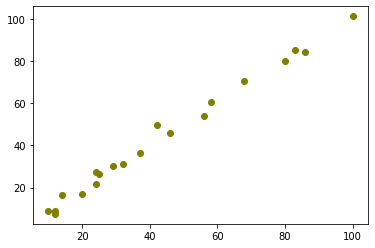

In [81]:
Y_test = []
for i in range(20):
    y_pos = trace['y_test_%u'%i]
    Y_test.append(np.random.choice(y_pos))
plt.figure()
plt.scatter(X_test[:20], Y_test, color="#808000")

In [82]:
for i in range(20):
    print(X_test[i], Y_test[i])

68 70.64254957602998
20 16.947897918677675
25 26.590294929798638
24 21.691952643423342
42 49.59529656621362
83 85.02605023907923
58 60.52661765794675
24 27.43281064071983
80 80.05482815468207
10 9.097465253717528
12 7.501418491027901
12 8.805655136652353
32 31.14586738725558
46 45.737543696646206
86 84.43814186045601
37 36.143452697054514
29 30.311951934094605
14 16.544774273018778
56 53.85515986679429
100 101.22760187534766


In [166]:
N= 25
X = train_x
Y = train_y

X_test = xs


# learning 

with pm.Model() as model:
    siga = 1
    sigb = 10
    
    a1 = pm.Normal('a1', mu=1, sigma=siga)
    b1 = pm.Normal('b1', mu=0, sigma=sigb)
    a2 = pm.Normal('a2', mu=-1, sigma=siga)
    b2 = pm.Normal('b2', mu=100, sigma=sigb)
    
#     arr = np.array([a1, a2])
#     a = pm.Deterministic('a', np.array([a1, a2]))
#     b = pm.Deterministic('b', np.array([b1, b2]))

#     a = np.array([a1, a2])
#     b = np.array([b1, b2])

    a = pm.Deterministic('a', tt.stack([a1, a2]))
    b = pm.Deterministic('b', tt.stack([b1, b2]))
    
    p = pm.Uniform('p', lower=0, upper=1)
    
    
#     z = pm.Binomial('z', n=1, p=p, shape=N)
#     mu = a[z]*X + b[z]
#     e = pm.Normal('e', 0, 2)
#     y = pm.Normal('y', mu=mu, sigma=e, observed=Y[i])
    
    for i in range(N):
        z = pm.Bernoulli('z_%u' % i, p=p)
        mu = a[z]*X[i] + b[z]
        y = pm.Normal('y_%u' % i, mu=mu, sigma=2, observed=Y[i])
    
    for i in range(20):
        z_test = pm.Bernoulli('z_test_%u' % i, p=p)
        mu_test = a[z_test]*X_test[i] + b[z_test]
        y_test = pm.Normal('y_test_%u' % i, mu=mu_test, sigma=2)
    
    trace = pm.sample(100)
        
        
# sample random 25 X for the next generation                                                                                                          7 7rr

INFO (theano.gof.compilelock): Refreshing lock /Users/pkarnati/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock
Only 100 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [y_test_19, y_test_18, y_test_17, y_test_16, y_test_15, y_test_14, y_test_13, y_test_12, y_test_11, y_test_10, y_test_9, y_test_8, y_test_7, y_test_6, y_test_5, y_test_4, y_test_3, y_test_2, y_test_1, y_test_0, p, b2, a2, b1, a1]
>BinaryGibbsMetropolis: [z_0, z_1, z_2, z_3, z_4, z_5, z_6, z_7, z_8, z_9, z_10, z_11, z_12, z_13, z_14, z_15, z_16, z_17, z_18, z_19, z_20, z_21, z_22, z_23, z_24, z_test_0, z_test_1, z_test_2, z_test_3, z_test_4, z_test_5, z_test_6, z_test_7, z_test_8, z_test_9, z_test_10, z_test_11, z_test_12, z_test_13, z_test_14, z_test_15, z_test_16, z_test_17, z_test_18, z_test_19]
Sampling 4 chains, 0 divergences: 100%|██████████| 2400/2400 [01:45<00:00, 22.70draws/s]
/Users/pkarnati/Library/Python/3.6/lib/python/site-packages/xarray/core/np

array([<matplotlib.axes._subplots.AxesSubplot object at 0x131c10dd8>],
      dtype=object)

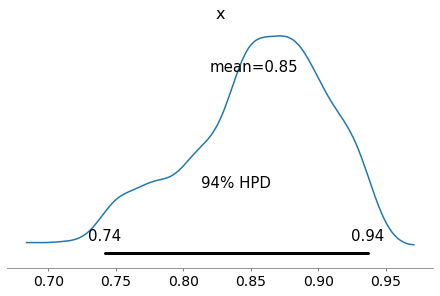

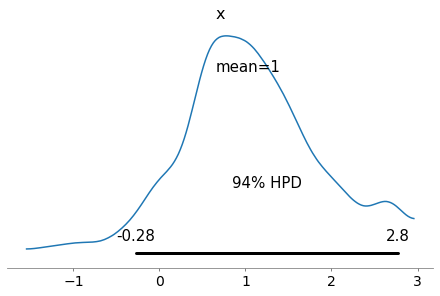

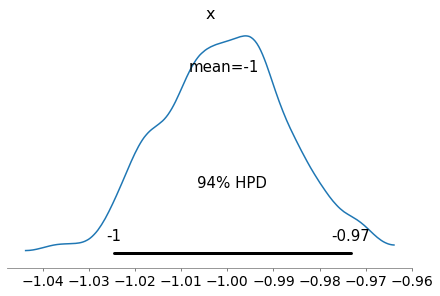

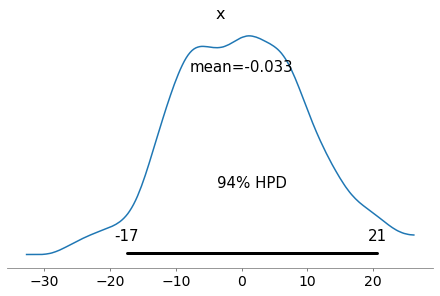

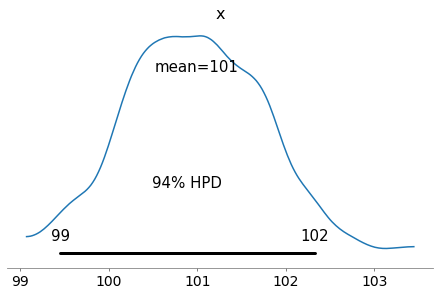

In [167]:
# p is low, p = probability of getting 1 for Bernoulli flip
pm.plot_posterior(trace['p'])
pm.plot_posterior(trace['a1'])
pm.plot_posterior(trace['a2'])
pm.plot_posterior(trace['b1'])
pm.plot_posterior(trace['b2'])

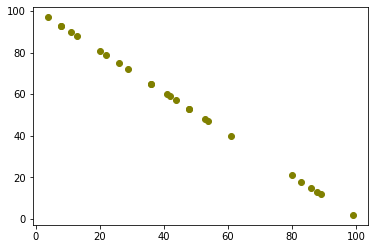

In [168]:
plt.figure()
plt.scatter(X, Y, color="#808000")

(0, 100)

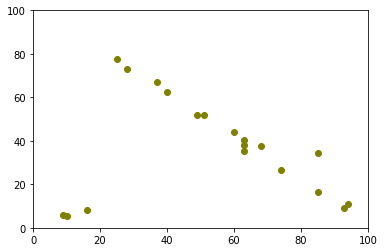

In [179]:
Y_test = []
for i in range(20):
    y_pos = trace['y_test_%u'%i]
    Y_test.append(np.random.choice(y_pos))
plt.figure()
plt.scatter(X_test[:20], Y_test, color="#808000")
plt.ylim([0,100])
plt.xlim([0,100])

In [181]:
N= 25
X = train_x
Y = train_y

X_test = xs


# learning 

with pm.Model() as model:
    siga = 1
    sigb = 10
    
    a1 = pm.Normal('a1', mu=1, sigma=siga)
    b1 = pm.Normal('b1', mu=0, sigma=sigb)
    a2 = pm.Normal('a2', mu=-1, sigma=siga)
    b2 = pm.Normal('b2', mu=100, sigma=sigb)

    a = pm.Deterministic('a', tt.stack([a1, a2]))
    b = pm.Deterministic('b', tt.stack([b1, b2]))
    
#     p = pm.Uniform('p', lower=0, upper=1)


    # Dirichlet distribution returns an array of probabilties
    # returns the prior distribution on the categorical distribution
    # alpha = (4,1) states that the categorical distribution is initially
    #         more heavily weighted towards the first value in the categorical
    #         array which is the positive slope
    p = pm.Dirichlet('p', a=np.array([4,1]))

    
    for i in range(N):
        z = pm.Categorical('z_%u' % i, p=p)
        mu = a[z]*X[i] + b[z]
        y = pm.Normal('y_%u' % i, mu=mu, sigma=2, observed=Y[i])
    
    for i in range(20):
        z_test = pm.Categorical('z_test_%u' % i, p=p)
        mu_test = a[z_test]*X_test[i] + b[z_test]
        y_test = pm.Normal('y_test_%u' % i, mu=mu_test, sigma=2)
    
    trace = pm.sample(100)
        
        
# sample random 25 X for the next generation                                                                                                          7 7rr

INFO (theano.gof.compilelock): Refreshing lock /Users/pkarnati/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock
Only 100 samples in chain.
INFO (theano.gof.compilelock): Refreshing lock /Users/pkarnati/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [y_test_19, y_test_18, y_test_17, y_test_16, y_test_15, y_test_14, y_test_13, y_test_12, y_test_11, y_test_10, y_test_9, y_test_8, y_test_7, y_test_6, y_test_5, y_test_4, y_test_3, y_test_2, y_test_1, y_test_0, p, b2, a2, b1, a1]
>BinaryGibbsMetropolis: [z_0, z_1, z_2, z_3, z_4, z_5, z_6, z_7, z_8, z_9, z_10, z_11, z_12, z_13, z_14, z_15, z_16, z_17, z_18, z_19, z_20, z_21, z_22, z_23, z_24, z_test_0, z_test_1, z_test_2, z_test_3, z_test_4, z_test_5, z_test_6, z_test_7, z_test_8, z_test_9, z_test_10, z_test_11, z_test_12, z_test_13, z_test_14, z_test_15, z_test_16, z_test_17, z_test_18, z_test_19]
Sampling 4 chains, 42

/Users/pkarnati/Library/Python/3.6/lib/python/site-packages/arviz/data/base.py:141: SyntaxWarning: More chains (400) than draws (2). Passed array should have shape (chains, draws, *shape)
  SyntaxWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12bd0ecf8>],
      dtype=object)

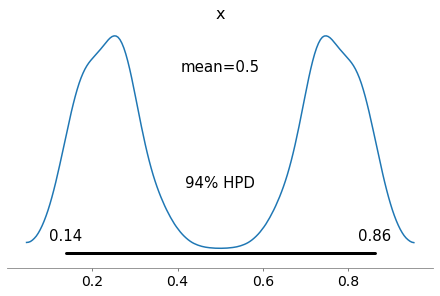

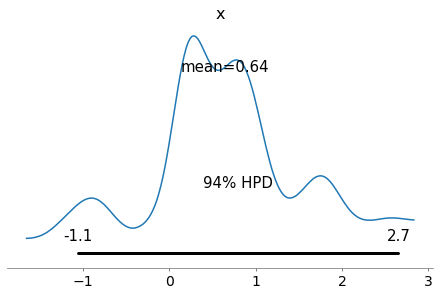

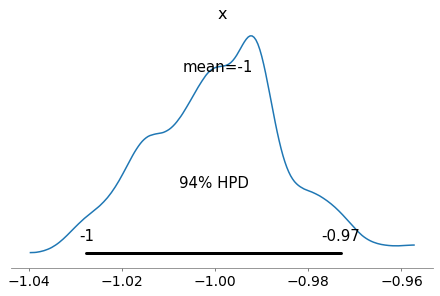

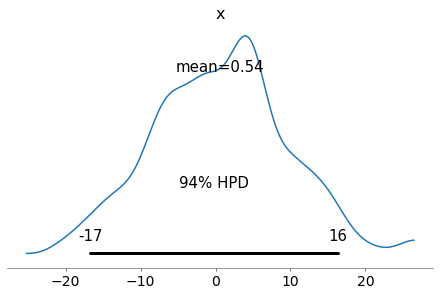

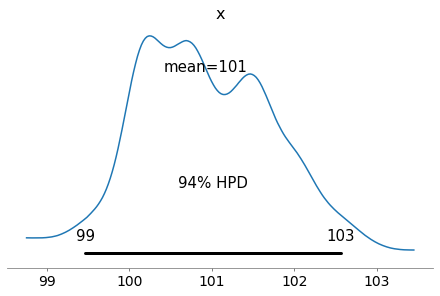

In [185]:
# p is low, p = probability of getting 1 for Bernoulli flip
pm.plot_posterior(trace['p'])
pm.plot_posterior(trace['a1'])
pm.plot_posterior(trace['a2'])
pm.plot_posterior(trace['b1'])
pm.plot_posterior(trace['b2'])

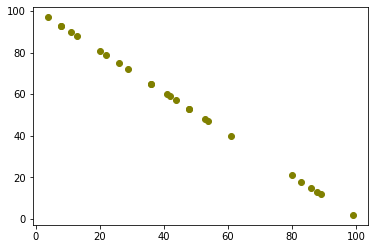

In [186]:
plt.figure()
plt.scatter(X, Y, color="#808000")

(0, 100)

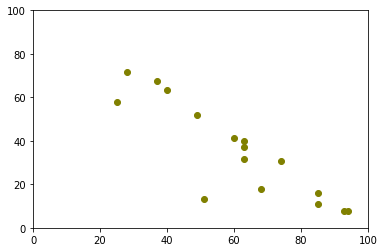

In [212]:
Y_test = []
for i in range(20):
    y_pos = trace['y_test_%u'%i]
    Y_test.append(np.random.choice(y_pos))
plt.figure()
plt.scatter(X_test[:20], Y_test, color="#808000")
plt.ylim([0,100])
plt.xlim([0,100])

# Multiple Generations Using New Model

Plot for the negative function

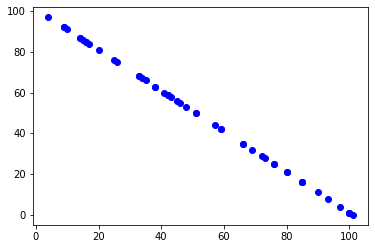

In [215]:
xs_1, ys_1 = plot_function(1, plot=True)
xs = list(np.copy(xs_1))
ys = list(np.copy(ys_1))

In [216]:
train_x = []
train_y = []
for i in range(25):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    train_x.append(x)
    train_y.append(y)

25

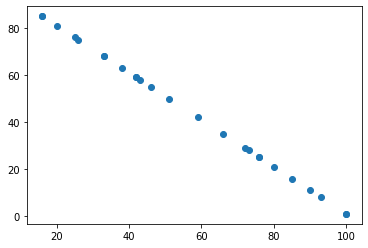

In [224]:
plt.scatter(train_x, train_y)
len(xs)

Creating model...


INFO (theano.gof.compilelock): Refreshing lock /Users/pkarnati/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock


Training on 25 points...
Generating test set...


Only 100 samples in chain.
INFO (theano.gof.compilelock): Refreshing lock /Users/pkarnati/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [y_test_19, y_test_18, y_test_17, y_test_16, y_test_15, y_test_14, y_test_13, y_test_12, y_test_11, y_test_10, y_test_9, y_test_8, y_test_7, y_test_6, y_test_5, y_test_4, y_test_3, y_test_2, y_test_1, y_test_0, p, b2, a2, b1, a1]
>BinaryGibbsMetropolis: [z_0, z_1, z_2, z_3, z_4, z_5, z_6, z_7, z_8, z_9, z_10, z_11, z_12, z_13, z_14, z_15, z_16, z_17, z_18, z_19, z_20, z_21, z_22, z_23, z_24, z_test_0, z_test_1, z_test_2, z_test_3, z_test_4, z_test_5, z_test_6, z_test_7, z_test_8, z_test_9, z_test_10, z_test_11, z_test_12, z_test_13, z_test_14, z_test_15, z_test_16, z_test_17, z_test_18, z_test_19]
Sampling 4 chains, 0 divergences: 100%|██████████| 2400/2400 [03:06<00:00, 12.89draws/s]
/Users/pkarnati/Library/Python/3.6/lib/python/site-packages/xarray/core/np

Generating graph for next generation...


(0, 100)

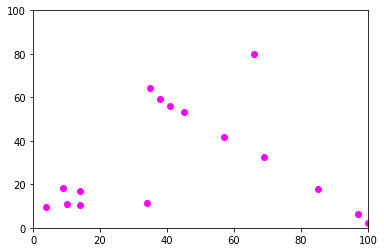

In [225]:
N= 25
X = train_x
Y = train_y

X_test = xs


# learning 

with pm.Model() as model:
    siga = 1
    sigb = 10
    
    print('Creating model...')
    
    a1 = pm.Normal('a1', mu=1, sigma=siga)
    b1 = pm.Normal('b1', mu=0, sigma=sigb)
    a2 = pm.Normal('a2', mu=-1, sigma=siga)
    b2 = pm.Normal('b2', mu=100, sigma=sigb)

    a = pm.Deterministic('a', tt.stack([a1, a2]))
    b = pm.Deterministic('b', tt.stack([b1, b2]))


    # Dirichlet distribution returns an array of probabilties
    # returns the prior distribution on the categorical distribution
    # alpha = (4,1) states that the categorical distribution is initially
    #         more heavily weighted towards the first value in the categorical
    #         array which is the positive slope
    p = pm.Dirichlet('p', a=np.array([4,1]))

    print('Training on 25 points...')
    
    for i in range(N):
        z = pm.Categorical('z_%u' % i, p=p)
        mu = a[z]*X[i] + b[z]
        y = pm.Normal('y_%u' % i, mu=mu, sigma=2, observed=Y[i])
        
    print('Generating test set...')
    
    for i in range(N):
        z_test = pm.Categorical('z_test_%u' % i, p=p)
        mu_test = a[z_test]*X_test[i] + b[z_test]
        y_test = pm.Normal('y_test_%u' % i, mu=mu_test, sigma=2)
    
    trace = pm.sample(100)
        
print('Generating graph for next generation...')
Y_test = []
for i in range(20):
    y_pos = trace['y_test_%u'%i]
    Y_test.append(np.random.choice(y_pos))
plt.figure()
plt.scatter(X_test, Y_test, color="#FF00FF")
plt.ylim([0,100])
plt.xlim([0,100])

In [234]:
len(X_test[:20]), len(Y_test)
new_x = [random.randint(1,101) for i in range(25)]

Creating model...


INFO (theano.gof.compilelock): Refreshing lock /Users/pkarnati/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock


Training on 25 points...
Generating test set...


Only 100 samples in chain.
INFO (theano.gof.compilelock): Refreshing lock /Users/pkarnati/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [y_test_19, y_test_18, y_test_17, y_test_16, y_test_15, y_test_14, y_test_13, y_test_12, y_test_11, y_test_10, y_test_9, y_test_8, y_test_7, y_test_6, y_test_5, y_test_4, y_test_3, y_test_2, y_test_1, y_test_0, p, b2, a2, b1, a1]
>BinaryGibbsMetropolis: [z_0, z_1, z_2, z_3, z_4, z_5, z_6, z_7, z_8, z_9, z_10, z_11, z_12, z_13, z_14, z_15, z_16, z_17, z_18, z_19, z_test_0, z_test_1, z_test_2, z_test_3, z_test_4, z_test_5, z_test_6, z_test_7, z_test_8, z_test_9, z_test_10, z_test_11, z_test_12, z_test_13, z_test_14, z_test_15, z_test_16, z_test_17, z_test_18, z_test_19]
Sampling 4 chains, 0 divergences: 100%|██████████| 2400/2400 [00:54<00:00, 43.95draws/s]
/Users/pkarnati/Library/Python/3.6/lib/python/site-packages/xarray/core/nputils.py:223: RuntimeWarning: 

Generating graph for next generation...


ValueError: x and y must be the same size

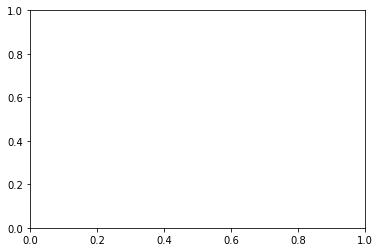

In [235]:
N = 20
X = X_test[:20]
Y = Y_test

X_test = new_x


# learning 

with pm.Model() as model:
    siga = 1
    sigb = 10
    
    print('Creating model...')
    
    a1 = pm.Normal('a1', mu=1, sigma=siga)
    b1 = pm.Normal('b1', mu=0, sigma=sigb)
    a2 = pm.Normal('a2', mu=-1, sigma=siga)
    b2 = pm.Normal('b2', mu=100, sigma=sigb)

    a = pm.Deterministic('a', tt.stack([a1, a2]))
    b = pm.Deterministic('b', tt.stack([b1, b2]))


    # Dirichlet distribution returns an array of probabilties
    # returns the prior distribution on the categorical distribution
    # alpha = (4,1) states that the categorical distribution is initially
    #         more heavily weighted towards the first value in the categorical
    #         array which is the positive slope
    p = pm.Dirichlet('p', a=np.array([4,1]))

    print('Training on 25 points...')
    
    for i in range(N):
        z = pm.Categorical('z_%u' % i, p=p)
        mu = a[z]*X[i] + b[z]
        y = pm.Normal('y_%u' % i, mu=mu, sigma=2, observed=Y[i])
        
    print('Generating test set...')
    
    for i in range(N):
        z_test = pm.Categorical('z_test_%u' % i, p=p)
        mu_test = a[z_test]*X_test[i] + b[z_test]
        y_test = pm.Normal('y_test_%u' % i, mu=mu_test, sigma=2)
    
    trace = pm.sample(100)
        
print('Generating graph for next generation...')
Y_test = []
for i in range(N):
    y_pos = trace['y_test_%u'%i]
    Y_test.append(np.random.choice(y_pos))
plt.figure()
plt.scatter(X_test, Y_test, color="#FF00FF")
plt.ylim([0,100])
plt.xlim([0,100])

(0, 100)

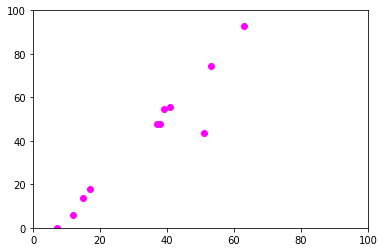

In [239]:
plt.scatter(X_test[:20], Y_test, color="#FF00FF")
plt.ylim([0,100])
plt.xlim([0,100])

Creating model...


INFO (theano.gof.compilelock): Refreshing lock /Users/pkarnati/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock


Training on 25 points...
Generating test set...


Only 100 samples in chain.
INFO (theano.gof.compilelock): Refreshing lock /Users/pkarnati/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [y_test_19, y_test_18, y_test_17, y_test_16, y_test_15, y_test_14, y_test_13, y_test_12, y_test_11, y_test_10, y_test_9, y_test_8, y_test_7, y_test_6, y_test_5, y_test_4, y_test_3, y_test_2, y_test_1, y_test_0, p, b2, a2, b1, a1]
>BinaryGibbsMetropolis: [z_0, z_1, z_2, z_3, z_4, z_5, z_6, z_7, z_8, z_9, z_10, z_11, z_12, z_13, z_14, z_15, z_16, z_17, z_18, z_19, z_test_0, z_test_1, z_test_2, z_test_3, z_test_4, z_test_5, z_test_6, z_test_7, z_test_8, z_test_9, z_test_10, z_test_11, z_test_12, z_test_13, z_test_14, z_test_15, z_test_16, z_test_17, z_test_18, z_test_19]
Sampling 4 chains, 0 divergences: 100%|██████████| 2400/2400 [00:52<00:00, 45.38draws/s]
/Users/pkarnati/Library/Python/3.6/lib/python/site-packages/xarray/core/nputils.py:223: RuntimeWarning: 

Generating graph for next generation...


(0, 100)

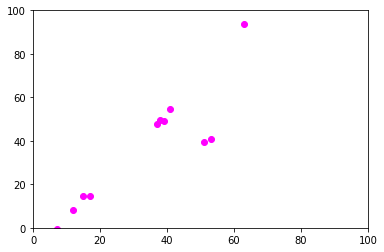

In [240]:
N = 20
X = X_test[:20]
Y = Y_test

X_test = new_x


# learning 

with pm.Model() as model:
    siga = 1
    sigb = 10
    
    print('Creating model...')
    
    a1 = pm.Normal('a1', mu=1, sigma=siga)
    b1 = pm.Normal('b1', mu=0, sigma=sigb)
    a2 = pm.Normal('a2', mu=-1, sigma=siga)
    b2 = pm.Normal('b2', mu=100, sigma=sigb)

    a = pm.Deterministic('a', tt.stack([a1, a2]))
    b = pm.Deterministic('b', tt.stack([b1, b2]))


    # Dirichlet distribution returns an array of probabilties
    # returns the prior distribution on the categorical distribution
    # alpha = (4,1) states that the categorical distribution is initially
    #         more heavily weighted towards the first value in the categorical
    #         array which is the positive slope
    p = pm.Dirichlet('p', a=np.array([4,1]))

    print('Training on 25 points...')
    
    for i in range(N):
        z = pm.Categorical('z_%u' % i, p=p)
        mu = a[z]*X[i] + b[z]
        y = pm.Normal('y_%u' % i, mu=mu, sigma=2, observed=Y[i])
        
    print('Generating test set...')
    
    for i in range(N):
        z_test = pm.Categorical('z_test_%u' % i, p=p)
        mu_test = a[z_test]*X_test[i] + b[z_test]
        y_test = pm.Normal('y_test_%u' % i, mu=mu_test, sigma=2)
    
    trace = pm.sample(100)
        
print('Generating graph for next generation...')
Y_test = []
for i in range(N):
    y_pos = trace['y_test_%u'%i]
    Y_test.append(np.random.choice(y_pos))
plt.figure()
plt.scatter(X_test[:20], Y_test, color="#FF00FF")
plt.ylim([0,100])
plt.xlim([0,100])

Creating model...


INFO (theano.gof.compilelock): Refreshing lock /Users/pkarnati/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock


Training on 25 points...
Generating test set...


Only 100 samples in chain.
INFO (theano.gof.compilelock): Refreshing lock /Users/pkarnati/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [y_test_19, y_test_18, y_test_17, y_test_16, y_test_15, y_test_14, y_test_13, y_test_12, y_test_11, y_test_10, y_test_9, y_test_8, y_test_7, y_test_6, y_test_5, y_test_4, y_test_3, y_test_2, y_test_1, y_test_0, p, b2, a2, b1, a1]
>BinaryGibbsMetropolis: [z_0, z_1, z_2, z_3, z_4, z_5, z_6, z_7, z_8, z_9, z_10, z_11, z_12, z_13, z_14, z_15, z_16, z_17, z_18, z_19, z_test_0, z_test_1, z_test_2, z_test_3, z_test_4, z_test_5, z_test_6, z_test_7, z_test_8, z_test_9, z_test_10, z_test_11, z_test_12, z_test_13, z_test_14, z_test_15, z_test_16, z_test_17, z_test_18, z_test_19]
Sampling 4 chains, 0 divergences: 100%|██████████| 2400/2400 [00:58<00:00, 40.83draws/s]
/Users/pkarnati/Library/Python/3.6/lib/python/site-packages/xarray/core/nputils.py:223: RuntimeWarning: 

Generating graph for next generation...


ValueError: x and y must be the same size

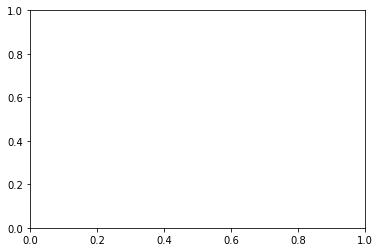

In [241]:
N = 20
X = X_test[:20]
Y = Y_test

X_test = new_x


# learning 

with pm.Model() as model:
    siga = 1
    sigb = 10
    
    print('Creating model...')
    
    a1 = pm.Normal('a1', mu=1, sigma=siga)
    b1 = pm.Normal('b1', mu=0, sigma=sigb)
    a2 = pm.Normal('a2', mu=-1, sigma=siga)
    b2 = pm.Normal('b2', mu=100, sigma=sigb)

    a = pm.Deterministic('a', tt.stack([a1, a2]))
    b = pm.Deterministic('b', tt.stack([b1, b2]))


    # Dirichlet distribution returns an array of probabilties
    # returns the prior distribution on the categorical distribution
    # alpha = (4,1) states that the categorical distribution is initially
    #         more heavily weighted towards the first value in the categorical
    #         array which is the positive slope
    p = pm.Dirichlet('p', a=np.array([4,1]))

    print('Training on 25 points...')
    
    for i in range(N):
        z = pm.Categorical('z_%u' % i, p=p)
        mu = a[z]*X[i] + b[z]
        y = pm.Normal('y_%u' % i, mu=mu, sigma=2, observed=Y[i])
        
    print('Generating test set...')
    
    for i in range(N):
        z_test = pm.Categorical('z_test_%u' % i, p=p)
        mu_test = a[z_test]*X_test[i] + b[z_test]
        y_test = pm.Normal('y_test_%u' % i, mu=mu_test, sigma=2)
    
    trace = pm.sample(100)
        
print('Generating graph for next generation...')
Y_test = []
for i in range(N):
    y_pos = trace['y_test_%u'%i]
    Y_test.append(np.random.choice(y_pos))
plt.figure()
plt.scatter(X_test, Y_test, color="#FF00FF")
plt.ylim([0,100])
plt.xlim([0,100])

(0, 100)

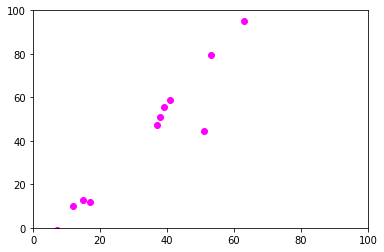

In [242]:
plt.scatter(X_test[:20], Y_test, color="#FF00FF")
plt.ylim([0,100])
plt.xlim([0,100])

Creating model...


INFO (theano.gof.compilelock): Refreshing lock /Users/pkarnati/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock


Training on 25 points...
Generating test set...


Only 100 samples in chain.
INFO (theano.gof.compilelock): Refreshing lock /Users/pkarnati/.theano/compiledir_Darwin-18.7.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [y_test_19, y_test_18, y_test_17, y_test_16, y_test_15, y_test_14, y_test_13, y_test_12, y_test_11, y_test_10, y_test_9, y_test_8, y_test_7, y_test_6, y_test_5, y_test_4, y_test_3, y_test_2, y_test_1, y_test_0, p, b2, a2, b1, a1]
>BinaryGibbsMetropolis: [z_0, z_1, z_2, z_3, z_4, z_5, z_6, z_7, z_8, z_9, z_10, z_11, z_12, z_13, z_14, z_15, z_16, z_17, z_18, z_19, z_test_0, z_test_1, z_test_2, z_test_3, z_test_4, z_test_5, z_test_6, z_test_7, z_test_8, z_test_9, z_test_10, z_test_11, z_test_12, z_test_13, z_test_14, z_test_15, z_test_16, z_test_17, z_test_18, z_test_19]
Sampling 4 chains, 0 divergences: 100%|██████████| 2400/2400 [00:55<00:00, 43.50draws/s]
/Users/pkarnati/Library/Python/3.6/lib/python/site-packages/xarray/core/nputils.py:223: RuntimeWarning: 

Generating graph for next generation...


(0, 100)

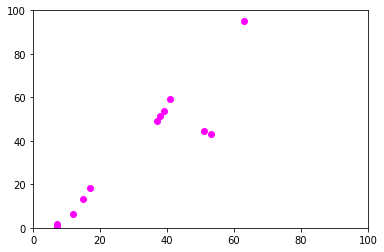

In [243]:
N = 20
X = X_test[:20]
Y = Y_test

X_test = new_x


# learning 

with pm.Model() as model:
    siga = 1
    sigb = 10
    
    print('Creating model...')
    
    a1 = pm.Normal('a1', mu=1, sigma=siga)
    b1 = pm.Normal('b1', mu=0, sigma=sigb)
    a2 = pm.Normal('a2', mu=-1, sigma=siga)
    b2 = pm.Normal('b2', mu=100, sigma=sigb)

    a = pm.Deterministic('a', tt.stack([a1, a2]))
    b = pm.Deterministic('b', tt.stack([b1, b2]))


    # Dirichlet distribution returns an array of probabilties
    # returns the prior distribution on the categorical distribution
    # alpha = (4,1) states that the categorical distribution is initially
    #         more heavily weighted towards the first value in the categorical
    #         array which is the positive slope
    p = pm.Dirichlet('p', a=np.array([4,1]))

    print('Training on 25 points...')
    
    for i in range(N):
        z = pm.Categorical('z_%u' % i, p=p)
        mu = a[z]*X[i] + b[z]
        y = pm.Normal('y_%u' % i, mu=mu, sigma=2, observed=Y[i])
        
    print('Generating test set...')
    
    for i in range(N):
        z_test = pm.Categorical('z_test_%u' % i, p=p)
        mu_test = a[z_test]*X_test[i] + b[z_test]
        y_test = pm.Normal('y_test_%u' % i, mu=mu_test, sigma=2)
    
    trace = pm.sample(100)
        
print('Generating graph for next generation...')
Y_test = []
for i in range(N):
    y_pos = trace['y_test_%u'%i]
    Y_test.append(np.random.choice(y_pos))
plt.figure()
plt.scatter(X_test[:20], Y_test, color="#FF00FF")
plt.ylim([0,100])
plt.xlim([0,100])